In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## 用LogisticRegression算法预测用户信用好坏
### Step1 数据理解

#### 1.1 简单的描述性统计分析

In [2]:
# 利用pandas导入csv数据，查看前5行导入结果看是否正常
import pandas as pd
credit_df = pd.read_csv("/Users/wang/university/homework/AI-astronomy/work/machine-learning/datasets/credit/credit.csv")
credit_df.describe()

,checking,duration,history,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,3271.258000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000
std,1.257638,12.058814,1.08312,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856
min,1.000000,4.000000,0.00000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.00000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,18.000000,2.00000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   checking  1000 non-null   int64 
 1   duration  1000 non-null   int64 
 2   history   1000 non-null   int64 
 3   purpose   1000 non-null   object
 4   amount    1000 non-null   int64 
 5   savings   1000 non-null   int64 
 6   employed  1000 non-null   int64 
 7   installp  1000 non-null   int64 
 8   marital   1000 non-null   int64 
 9   coapp     1000 non-null   int64 
 10  resident  1000 non-null   int64 
 11  property  1000 non-null   int64 
 12  age       1000 non-null   int64 
 13  other     1000 non-null   int64 
 14  housing   1000 non-null   int64 
 15  existcr   1000 non-null   int64 
 16  job       1000 non-null   int64 
 17  depends   1000 non-null   int64 
 18  telephon  1000 non-null   int64 
 19  foreign   1000 non-null   int64 
 20  good_bad  1000 non-null   object
dtypes: int64(19), o

In [4]:
credit_df.isnull().sum()

checking    0
duration    0
history     0
purpose     0
amount      0
savings     0
employed    0
installp    0
marital     0
coapp       0
resident    0
property    0
age         0
other       0
housing     0
existcr     0
job         0
depends     0
telephon    0
foreign     0
good_bad    0
dtype: int64

####  1.2 简单的频数分析

In [5]:
# 通过value_counts()函数对类别型变量进行频数统计
print(credit_df.purpose.value_counts())
print(credit_df.good_bad.value_counts())

purpose
3    280
0    234
2    181
1    103
9     97
6     50
5     22
4     12
X     12
8      9
Name: count, dtype: int64
good_bad
good    700
bad     300
Name: count, dtype: int64


### Step2 数据准备

#### 2.1 类别型变量进行数字编码（one-hot独热编码）

 把一个值变成矩阵,当** age、name ** 的可选项太多，不做独热

In [6]:
# 把类别型变量进行独热编码(1->N)  
checking = pd.get_dummies(credit_df.checking,prefix='checking')
history = pd.get_dummies(credit_df.history,prefix='history')
purpose = pd.get_dummies(credit_df.purpose,prefix='purpose')
savings = pd.get_dummies(credit_df.savings,prefix='savings')
employed = pd.get_dummies(credit_df.employed,prefix='employed')
installp = pd.get_dummies(credit_df.installp,prefix='installp')
marital = pd.get_dummies(credit_df.marital,prefix='marital')
coapp = pd.get_dummies(credit_df.coapp,prefix='coapp')
installp = pd.get_dummies(credit_df.installp,prefix='installp')
resident = pd.get_dummies(credit_df.resident,prefix='resident')
property = pd.get_dummies(credit_df.property,prefix='property')
housing = pd.get_dummies(credit_df.housing,prefix='housing')
existcr = pd.get_dummies(credit_df.existcr,prefix='existcr')
job = pd.get_dummies(credit_df.job,prefix='job')
depends = pd.get_dummies(credit_df.depends,prefix='depends')
telephon = pd.get_dummies(credit_df.telephon,prefix='telephon')
foreign = pd.get_dummies(credit_df.foreign,prefix='foreign')

# 随便查看一个编码后的数据
purpose.head()

,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_8,purpose_9,purpose_X
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False


In [8]:
# 利用concat()函数把转换后的数据对象全部合并在一起变成新的数据对象，命名为trainData_X
trainData_X = pd.concat([credit_df.duration, credit_df.amount, credit_df.age, checking, history, purpose, savings, employed, installp, marital, coapp, installp, resident, property, housing, existcr, job, depends, telephon, foreign], axis=1)
trainData_X.head()
# 72 columns
##前面3列无变化

,duration,amount,age,checking_1,checking_2,checking_3,checking_4,history_0,history_1,history_2,...,job_1,job_2,job_3,job_4,depends_1,depends_2,telephon_1,telephon_2,foreign_1,foreign_2
0,6,1169,67,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,True,False
1,48,5951,22,False,True,False,False,False,False,True,...,False,False,True,False,True,False,True,False,True,False
2,12,2096,49,False,False,False,True,False,False,False,...,False,True,False,False,False,True,True,False,True,False
3,42,7882,45,True,False,False,False,False,False,True,...,False,False,True,False,False,True,True,False,True,False
4,24,4870,53,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False


In [9]:
# 构造目标变量y的数据对象
# 当前的目标变量good_bad的取值是'good'和'bad'，一般我们习惯把二分类的类别值编码为0和1，1一般表示类别比较少的那一类，他们往往是我们感兴趣的
credit_df['target'] = 0
credit_df.loc[(credit_df.good_bad == 'bad'), 'target'] = 1

trainData_y = credit_df['target'] 
trainData_y.value_counts()

target
0    700
1    300
Name: count, dtype: int64

####  2.2数据集拆分成train和test


In [10]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainData_X, trainData_y, test_size=0.3, random_state=123456)

####  2.3准备好X_train,y_train,X_test,y_test数据对象

In [11]:
# 查看一下拆分后的train和test的shape，确认拆分正确
print(X_train.shape,X_test.shape)

(700, 72) (300, 72)


### Step3 模型训练和调参


#### 3.1 选择选择一个分类算法

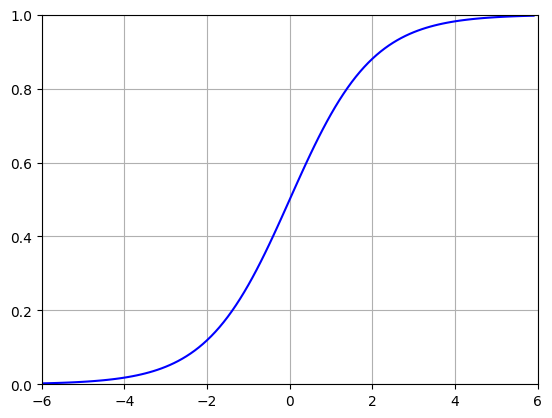

In [26]:
# 了解一下sigmoid曲线
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np


#sigmoid函数
y=1/(1+np.e**(-X))
X=np.arange(-6,6,0.1)

#plt.figure()
plt.axis([-6,6,0,1])
plt.grid(True)
plt.plot(X,y,'b-')
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression

# 通过LogisticRegression类定义一个逻辑回归模型名字叫lr
lr = LogisticRegression(solver='liblinear')

# 对lr模型进行训练(fit)
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
# 查看模型结果
print(lr.intercept_ )
print(lr.coef_)

# 把变量名称和系数对应在一起方便查看
pd.DataFrame(list(zip(np.transpose(lr.coef_), X_train.columns)), columns=['coef', 'columns'])

[-0.29172793]
[[ 2.83468018e-02  1.11550065e-04 -1.32182403e-02  7.30298675e-01
   1.89700875e-01 -1.48416743e-01 -1.06331073e+00  5.52944124e-01
   7.00970971e-01 -1.95923054e-01 -5.08301779e-01 -8.41418188e-01
   5.78990427e-01 -1.02765871e+00 -5.19007761e-01 -3.10160803e-01
   8.35559104e-02  4.42871024e-01  9.71430971e-01 -4.01717637e-02
  -2.75691088e-01 -1.95886137e-01  4.20836477e-01  2.60895676e-01
  -1.99043007e-02 -4.51045688e-01 -5.02510091e-01  3.99959374e-03
   1.67239233e-01 -6.34828251e-03 -4.30205318e-01 -2.64131537e-02
  -3.24742232e-01 -1.61721223e-01  9.33204864e-02  1.01415042e-01
   2.42409903e-01  4.83737614e-02 -4.54945629e-01 -1.27565962e-01
  -7.68572360e-02  3.92534884e-01 -6.07405575e-01 -3.24742232e-01
  -1.61721223e-01  9.33204864e-02  1.01415042e-01 -4.82691402e-01
   3.70446309e-01 -1.35062283e-02 -1.65976605e-01 -2.38577617e-01
   2.64545579e-02 -4.20528067e-02 -3.75520611e-02  2.21796511e-01
  -3.75506404e-01 -1.38018033e-01 -3.65477762e-01 -7.63415096e

,coef,columns
0,[0.028346801839660377],duration
1,[0.0001115500646244194],amount
2,[-0.01321824025885203],age
3,[0.7302986754319621],checking_1
4,[0.18970087542663644],checking_2
...,...,...
67,[0.06379710164337421],depends_2
68,[0.022331118531240778],telephon_1
69,[-0.31405904525285777],telephon_2
70,[0.5704688512334162],foreign_1


In [17]:
# grid search调参
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty': ('l1', 'l2'),
    'C': (0.01, 0.1, 1, 10),
}

lr = LogisticRegression(solver='liblinear')
lr_search = GridSearchCV(lr, parameters, scoring='accuracy', cv=5)
lr_search.fit(X_train, y_train)

#查看最佳结果
print(lr_search.best_estimator_)
print(lr_search.best_score_)
print(lr_search.best_params_)


LogisticRegression(C=1, solver='liblinear')
0.7628571428571428
{'C': 1, 'penalty': 'l2'}


In [18]:
# 用最佳参数重新训练模型
lr = LogisticRegression(C=1,penalty='l2',solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       210
           1       0.61      0.56      0.58        90

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.71       300
weighted avg       0.75      0.76      0.76       300

[[178  32]
 [ 40  50]]


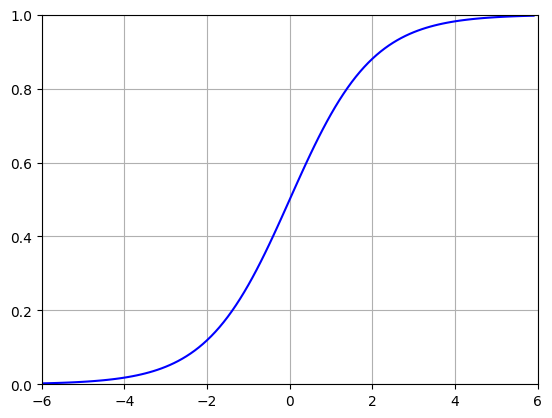

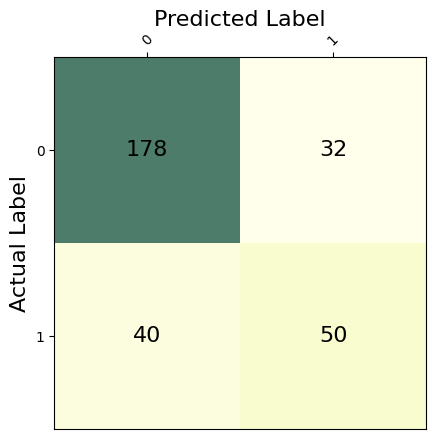

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)

# 分类评估汇总报告classification_report
print(classification_report(y_test,y_test_pred))

# 误分类矩阵 confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()